1. Connect to h2o
2. Simple Linear Regression Example
3. Multiple Linear Regression Example

# 1. Connect to H2o

In [4]:
import h2o

In [5]:
# Define the URL to the h2o server/cluster
ip = "127.0.0.1"
port = 54321
url = "http://{0}:{1}".format(ip, port)
print(url)

http://127.0.0.1:54321


In [6]:
h2o.init(url=url)

Checking whether there is an H2O instance running at http://127.0.0.1:54321 . connected.


H2O_cluster_uptime:,2 hours 48 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"14 days, 2 hours and 41 minutes"
H2O_cluster_name:,Administrator
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.274 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# 2. Simple Linear Regression (gaussian family)

In [22]:
# https://realpython.com/linear-regression-in-python/
x = [5, 15, 25, 35, 45, 55]
y = [5, 20, 14, 32, 22, 38]
h2o_frame = h2o.H2OFrame({
    "x": x,
    "y": y
})
h2o_frame

Parse progress: |█████████████████████████████████████████████████████████| 100%


x,y
5,5
15,20
25,14
35,32
45,22
55,38


In [23]:
predictors = ["x"]
response = "y"

In [24]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian",
                                          lambda_ = 0,
                                          compute_p_values = True)

In [25]:
glm_model.train(predictors, response, training_frame=h2o_frame)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [26]:
glm_model.model_performance

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1596579253375_4


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,None,1,1,1,Key_Frame__upload_a143c8cb8906624deabc561f64604c86.hex




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 33.75555555555555
RMSE: 5.809953145728075
MAE: 5.466666666666666
RMSLE: 0.3071613256263486
R^2: 0.7158756137479543
Mean Residual Deviance: 33.75555555555555
Null degrees of freedom: 5
Residual degrees of freedom: 4
Null deviance: 712.8333333333334
Residual deviance: 202.5333333333333
AIC: 44.14213247540879

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-08-04 20:17:27,0.000 sec,0,712.833333,118.805556


<bound method ModelBase.model_performance of >

In [27]:
# We can extract specific metrics as follows:
# https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
glm_model.r2()

0.7158756137479543

In [34]:
predicted_values = glm_model.predict(h2o_frame["x"])
predicted_values

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,StdErr
8.33333,5.14997
13.7333,3.86638
19.1333,3.02692
24.5333,3.02692
29.9333,3.86638
35.3333,5.14997


In [49]:
# Convert the h2o frame to a python list and remove first element (unnecessary column name)
# https://h2o-release.s3.amazonaws.com/h2o/rel-turan/4/docs-website/h2o-py/docs/h2o.html
y_hat = h2o.as_list(predicted_values["predict"])["predict"]
y_hat

0     8.333333
1    13.733333
2    19.133333
3    24.533333
4    29.933333
5    35.333333
Name: predict, dtype: float64

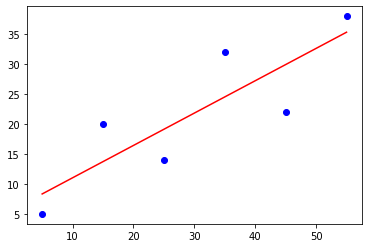

In [52]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', marker='o')
plt.plot(x, y_hat, color='red')

# 3. Multiple Linear Regression (gaussian family)

In [90]:
a = [ 5, 15,  25,  35,  45,  55]
b = [ 1,  8,  12,  13,  16,  22]
c = [ 3,  5,   2,  15,  12,  14]
d = [-5, -4, -11, -12, -20, -23]
y = [ 10, 20,  14,  32,  22,  26]
h2o_frame = h2o.H2OFrame({
    "a": a,
    "b": b,
    "c": c,
    "d": d,
    "y": y
})
h2o_frame

Parse progress: |█████████████████████████████████████████████████████████| 100%


a,b,c,d,y
5,1,3,-5,10
15,8,5,-4,20
25,12,2,-11,14
35,13,15,-12,32
45,16,12,-20,22
55,22,14,-23,26


In [91]:
predictors = ["a", "b", "c", "d"]
response = "y"

In [92]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian",
                                          lambda_ = 0,
                                          compute_p_values = True)

In [93]:
glm_model.train(predictors, response, training_frame=h2o_frame)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [94]:
glm_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,12.319886,2.191234,5.622350,0.112058,20.666667
1,a,0.911119,0.887777,1.026293,0.491740,17.045471
2,b,-0.265805,1.178490,-0.225547,0.858775,-1.894500
3,c,0.846544,0.557593,1.518210,0.370797,4.928890
4,d,1.839420,0.820730,2.241198,0.267177,14.188591


In [95]:
glm_model.model_performance

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1596579253375_7


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,None,4,4,1,Key_Frame__upload_a14f21075906fac68478d4bac8e147a9.hex




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.256118440340076
RMSE: 0.5060814562301962
MAE: 0.4338082673702723
RMSLE: 0.025156728706648524
R^2: 0.9951574244473516
Mean Residual Deviance: 0.256118440340076
Null degrees of freedom: 5
Residual degrees of freedom: 1
Null deviance: 317.3333333333333
Residual deviance: 1.5367106420404562
AIC: 20.85457069495305

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-08-04 21:52:02,0.000 sec,0,317.333333,52.888889


<bound method ModelBase.model_performance of >

In [96]:
predicted_values = glm_model.predict(h2o_frame[:, ["a", "b", "c", "d"]])
predicted_values

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,StdErr
9.95221,1.23872
20.7353,0.998044
13.3677,1.06624
31.3787,1.0727
22.4375,1.15988
26.1287,1.23295


In [97]:
y_hat = h2o.as_list(predicted_values["predict"])["predict"]
y_hat

0     9.952208
1    20.735268
2    13.367669
3    31.378698
4    22.437485
5    26.128672
Name: predict, dtype: float64

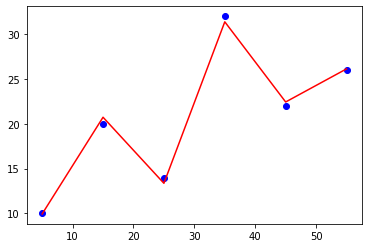

In [98]:
import matplotlib.pyplot as plt
plt.scatter(a, y, color='blue', marker='o')
plt.plot(a, y_hat, color='red')

In [99]:
glm_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,12.319886,2.191234,5.622350,0.112058,20.666667
1,a,0.911119,0.887777,1.026293,0.491740,17.045471
2,b,-0.265805,1.178490,-0.225547,0.858775,-1.894500
3,c,0.846544,0.557593,1.518210,0.370797,4.928890
4,d,1.839420,0.820730,2.241198,0.267177,14.188591


In [100]:
coeffs = glm_model._model_json['output']['coefficients_table']['coefficients']
coeffs

[12.319885664028387,
 0.9111187335093489,
 -0.26580474934051784,
 0.8465435356199827,
 1.8394195250660663]

In [101]:
y_hat_0 = coeffs[0] + coeffs[1] * a[0] + coeffs[2] * b[0] + coeffs[3] * c[0] + coeffs[4] * d[0]
y_hat_0

9.952207563764231

In [102]:
y_hat_1 = coeffs[0] + coeffs[1] * a[1] + coeffs[2] * b[1] + coeffs[3] * c[1] + coeffs[4] * d[1]
y_hat_1

20.735268249780123